In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df=pd.read_csv(r'D:\OM\Codes And Projects\Data Science Projects\ML Model Implementations\1) Simple Linear Regression\Project 2\data\Advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
X = df[['TV']]     # independent variable
y = df['Sales']   # target

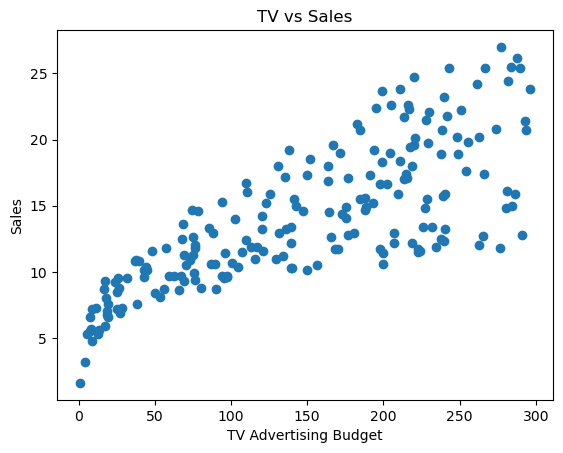

In [11]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
print(model.coef_) # m 
print(model.intercept_) # c

[0.04652973]
7.1196384305929525


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(2.444420003751042, np.float64(3.194472431998898), 0.6766954295627077)

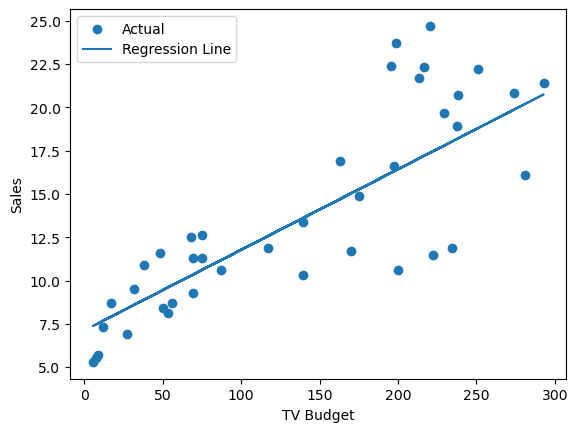

In [16]:
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, label="Regression Line")
plt.xlabel("TV Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [39]:
model.predict([[50]])

d:\New folder\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.44612512])

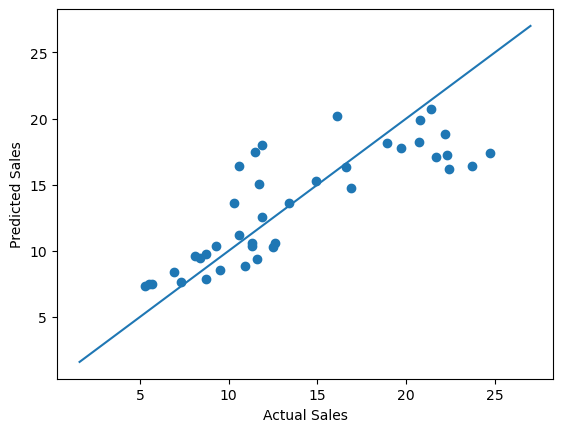

In [19]:
# For a given actual sales value, what did my model predict?
# How close are my predictions to the real values?
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

##### plt.plot([a, b], [a, b])
##### Which draws a straight line from: Point (a, a) To point (b, b)
##### This is the y = x line.

Means:

Point 1 → (1.6, 1.6)

Point 2 → (27, 27)

Matplotlib draws a straight line connecting these two points.

#### The Actual vs Predicted plot compares true sales values with model predictions, where points closer to the diagonal indicate more accurate predictions and confirm the model’s strong performance.

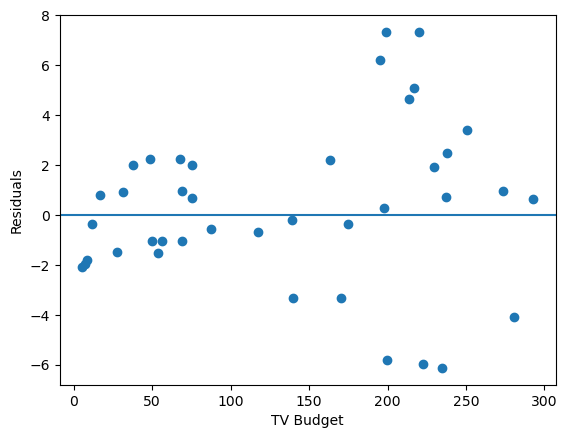

In [20]:
residuals = y_test - y_pred

plt.scatter(X_test, residuals)
plt.axhline(0)
plt.xlabel("TV Budget")
plt.ylabel("Residuals")
plt.show()

Think of linear regression as throwing a straight stick through noisy points.

model.fit() → finds best stick position

plt.plot(X_test, y_pred) → draws the stick

plt.scatter(y_test, y_pred) → checks how close predictions are to truth

y = x line → shows perfection

Linear regression learns a straight-line equation of the form y = mx + c by minimizing the squared prediction errors. Plotting X_test against y_pred visualizes the learned regression line in input space, while plotting actual values against predicted values compares model outputs with true targets. The y = x reference line represents perfect predictions and helps visually assess prediction accuracy.